In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris,load_wine, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from VotingRegressor import VotingRegressor
from sklearn.ensemble import VotingRegressor as SklearnVotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR


In [2]:
# Load datasets
datasets = {
    'iris': load_iris(),    
    'wine': load_wine(),
    'Diabetes': load_diabetes()
}

# Define base regressors
base_regressors = [
    ('dt', DecisionTreeRegressor(max_depth=1)),
    ('lr', LinearRegression()),
    ('svr', SVR(kernel='linear'))
]

In [3]:
# Initialize your voting regressor
voting_regressor = VotingRegressor(base_regressors)

# Initialize scikit-learn's voting regressor
sklearn_voting_regressor = SklearnVotingRegressor(estimators=base_regressors)

results = {}
for name, data in datasets.items():
    X, y = data.data, data.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    voting_regressor.fit(X_train, y_train)
    sklearn_voting_regressor.fit(X_train, y_train)

    voting_regressor_pred = voting_regressor.predict(X_test)
    sklearn_voting_regressor_pred = sklearn_voting_regressor.predict(X_test)

    voting_regressor_score = r2_score(y_test, voting_regressor_pred)
    sklearn_voting_regressor_score = r2_score(y_test, sklearn_voting_regressor_pred)

    results[name] = {
        'Voting Regressor': voting_regressor_score,
        'Scikit-learn Voting Regressor': sklearn_voting_regressor_score
    }


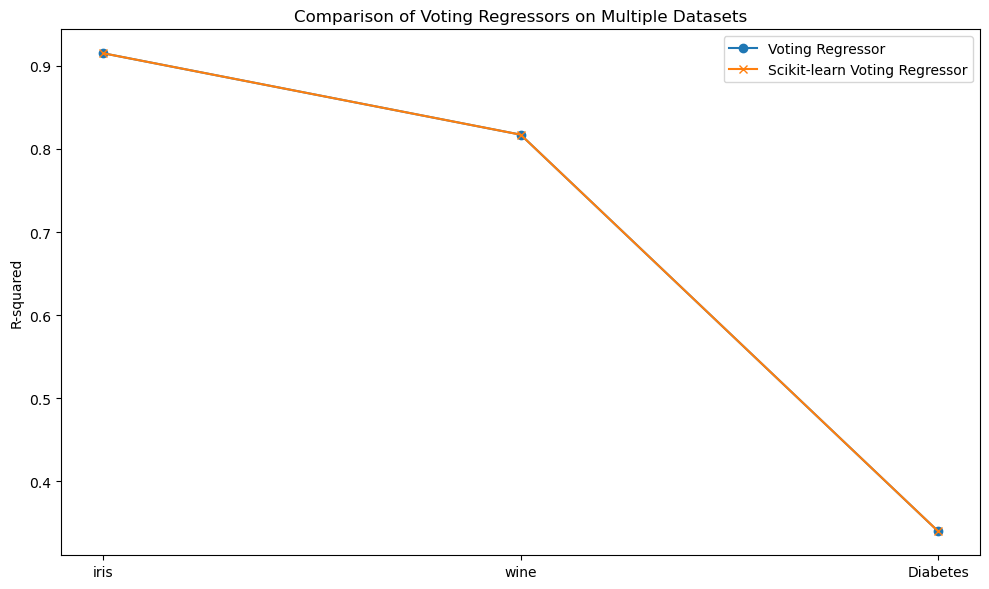

In [4]:
# Plot the results
fig, ax = plt.subplots(figsize=(10, 6))
labels = list(results.keys())
voting_scores = [results[name]['Voting Regressor'] for name in labels]
sklearn_voting_scores = [results[name]['Scikit-learn Voting Regressor'] for name in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

ax.plot(x, voting_scores, label='Voting Regressor', marker='o')
ax.plot(x, sklearn_voting_scores, label='Scikit-learn Voting Regressor', marker='x')

ax.set_ylabel('R-squared')
ax.set_title('Comparison of Voting Regressors on Multiple Datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()
